In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from skimage import io, filters
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import cv2
import numpy as np

image_path = '/content/drive/MyDrive/306_img'
image_files = os.listdir(image_path)
# images_list = sorted(os.listdir(os.path.join(image_path, 'Images')))

mask_path = '/content/drive/MyDrive/306_mask'
mask_files = os.listdir(mask_path)
# masks_list = sorted(os.listdir(os.path.join(mask_path, 'Masks')))

#print (image_files)  #what kinds of rooms are in this dataset

#print("Types of disease found: ", len(image_path))

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def load_images_from_folder(folder):
    images = []
    for filename in sorted(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder, filename))
        # img = cv2.imread(sorted(os.path.join(folder, filename)))
        if img is not None:
            images.append(img)
    return images
    # Load images and masks
images = load_images_from_folder(image_path)
masks = load_images_from_folder(mask_path)

In [4]:
def load_and_resize_images_from_folder(folder, target_size=(128,128,)):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        if img is None:
            print(f"Warning: Unable to load image {img_path}")
            continue
        img = cv2.resize(img, target_size)
        img=img/255.0
        images.append(img)
    return np.array(images)
images = load_and_resize_images_from_folder(image_path)
#masks = load_and_resize_images_from_folder(mask_path)

In [5]:
from PIL import Image
from tensorflow.keras.utils import to_categorical
num_classes=6
def load_and_resize_images_from_folder(folder, target_size=(128,128,)):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img=img[:,:,0];
        highest_class = np.max(img)

        # Create binary mask
        binary_mask = np.zeros_like(img)
        binary_mask[img == highest_class] = 1
        img=binary_mask

        # mip_2d = np.max(img, axis=0)

        # # Convert to binary mask
        # img = np.where(mip_2d > 0, 1, 0)


        if img is None:
            print(f"Warning: Unable to load image {img_path}")
            continue
        # img = cv2.resize(img.astype(np.uint8), (target_size), interpolation=cv2.INTER_NEAREST)
        img = cv2.resize(img, target_size)
        max_pixel_value = img.max()
        max_pixel_value_float = float(max_pixel_value)
        img=img/max_pixel_value_float
        images.append(img)
    return np.array(images)
#images = load_and_resize_images_from_folder(image_path)
masks = load_and_resize_images_from_folder(mask_path)

In [6]:
images.shape

(306, 128, 128, 3)

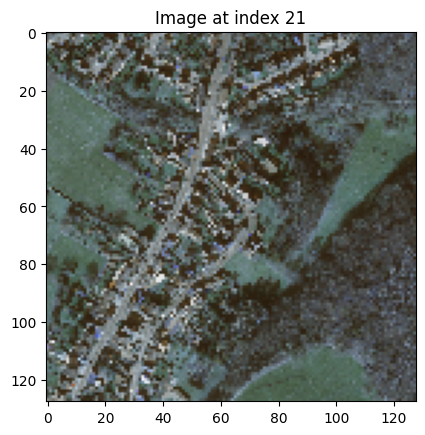

In [7]:
import matplotlib.pyplot as plt

# Ensure you're using the correct index (less than the size of the images array)
index_to_display = 21  # Choose an index between 0 and 33

# Assuming 'images' is the NumPy array of images
if index_to_display < len(images):
    plt.imshow(images[index_to_display], cmap='gray')
    plt.title(f"Image at index {index_to_display}")
    plt.show()
else:
    print(f"Error: Index {index_to_display} is out of bounds for the images array.")

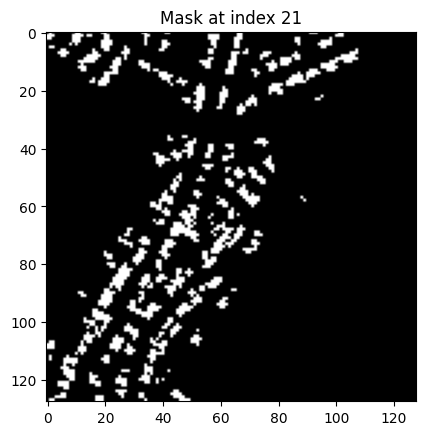

In [8]:
import matplotlib.pyplot as plt

# Change the index to be within the valid range (0-33)
index_to_display = 21  # Choose an index between 0 and 33

plt.imshow(masks[index_to_display], cmap='gray')
plt.title(f"Mask at index {index_to_display}")
plt.show()

In [ ]:
# Convert to numpy arrays
images = np.array(images)
masks = np.array(masks)

In [ ]:
images.shape

(51, 128, 128, 3)

In [9]:
masks.shape

(306, 128, 128)

In [10]:
mm=masks[1]
print(np.min(mm))

0.0


In [ ]:
# print(np.max(masks[100]))

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
def augment_image_and_mask(image, mask):
    # List to hold augmented images and masks
    augmented_images = []
    augmented_masks = []

    # Flip horizontally
    img_flip_h = cv2.flip(image, 1)
    mask_flip_h = cv2.flip(mask, 1)
    augmented_images.append(img_flip_h)
    augmented_masks.append(mask_flip_h)

    # Flip vertically
    img_flip_v = cv2.flip(image, 0)
    mask_flip_v = cv2.flip(mask, 0)
    augmented_images.append(img_flip_v)
    augmented_masks.append(mask_flip_v)

    # # Rotate 90 degrees
    # img_rot90 = np.rot90(image)
    # mask_rot90 = np.rot90(mask)
    # augmented_images.append(img_rot90)
    # augmented_masks.append(mask_rot90)

    # Rotate 180 degrees
    img_rot180 = np.rot90(image, 2)
    mask_rot180 = np.rot90(mask, 2)
    augmented_images.append(img_rot180)
    augmented_masks.append(mask_rot180)

    # # Rotate 270 degrees
    # img_rot270 = np.rot90(image, 3)
    # mask_rot270 = np.rot90(mask, 3)
    # augmented_images.append(img_rot270)
    # augmented_masks.append(mask_rot270)

    # Convert lists to numpy arrays
    augmented_images = np.array(augmented_images)
    augmented_masks = np.array(augmented_masks)

    return augmented_images, augmented_masks

# Apply augmentations and combine with original images and masks
combined_images = []
combined_masks = []

for img, msk in zip(images, masks):
    aug_imgs, aug_msks = augment_image_and_mask(img, msk)

    # Combine original and augmented images
    combined_images.append(img)
    combined_images.extend(aug_imgs)

    # Combine original and augmented masks
    combined_masks.append(msk)
    combined_masks.extend(aug_msks)

# Convert combined lists to numpy arrays
combined_images = np.array(combined_images)
combined_masks = np.array(combined_masks)


In [12]:
combined_images.shape

(1224, 128, 128, 3)

In [13]:
combined_masks.shape

(1224, 128, 128)

In [14]:
# from tensorflow.keras.layers import Layer
# import tensorflow as tf

# class InvolutionLayer(Layer):
#     def __init__(self, kernel_size=3, stride=1, num_channels=64, **kwargs):
#         super(InvolutionLayer, self).__init__(**kwargs)
#         self.kernel_size = kernel_size
#         self.stride = stride
#         self.num_channels = num_channels

#     def build(self, input_shape):
#         self.kernel_map_conv = self.add_weight(
#             shape=(1, 1, input_shape[-1], self.kernel_size * self.kernel_size),
#             initializer='random_normal',
#             trainable=True,
#             name="kernel_map_conv"
#         )

#     def call(self, x):
#         batch_size, height, width, channels = tf.shape(x)[0], tf.shape(x)[1], tf.shape(x)[2], x.shape[-1]
#         kernel_map = tf.nn.conv2d(x, self.kernel_map_conv, strides=[1, 1, 1, 1], padding='SAME')
#         kernel_map = tf.reshape(kernel_map, [batch_size, height, width, self.kernel_size, self.kernel_size])
#         x_unfolded = tf.image.extract_patches(x, sizes=[1, self.kernel_size, self.kernel_size, 1],
#                                               strides=[1, self.stride, self.stride, 1],
#                                               rates=[1, 1, 1, 1], padding='SAME')
#         x_unfolded = tf.reshape(x_unfolded, [batch_size, height, width, self.kernel_size, self.kernel_size, channels])
#         kernel_map = tf.expand_dims(kernel_map, axis=-1)
#         output = tf.reduce_sum(x_unfolded * kernel_map, axis=[3, 4])
#         return output

#     def compute_output_shape(self, input_shape):
#         return input_shape

#     def get_config(self):
#         config = super(InvolutionLayer, self).get_config()
#         config.update({
#             "kernel_size": self.kernel_size,
#             "stride": self.stride,
#             "num_channels": self.num_channels
#         })
#         return config

# # Register the custom layer when loading or saving the model
# ///////////////////////////////////////
from tensorflow.keras.layers import Layer
import tensorflow as tf
from tensorflow.keras.saving import register_keras_serializable

@register_keras_serializable()
class InvolutionLayer(Layer):
    def __init__(self, kernel_size=3, stride=1, num_channels=64, **kwargs):
        super(InvolutionLayer, self).__init__(**kwargs)
        self.kernel_size = kernel_size
        self.stride = stride
        self.num_channels = num_channels

    def build(self, input_shape):
        self.kernel_map_conv = self.add_weight(
            shape=(1, 1, input_shape[-1], self.kernel_size * self.kernel_size),
            initializer='random_normal',
            trainable=True,
            name="kernel_map_conv"
        )

    def call(self, x):
        batch_size, height, width, channels = tf.shape(x)[0], tf.shape(x)[1], tf.shape(x)[2], x.shape[-1]
        kernel_map = tf.nn.conv2d(x, self.kernel_map_conv, strides=[1, 1, 1, 1], padding='SAME')
        kernel_map = tf.reshape(kernel_map, [batch_size, height, width, self.kernel_size, self.kernel_size])
        x_unfolded = tf.image.extract_patches(x, sizes=[1, self.kernel_size, self.kernel_size, 1],
                                              strides=[1, self.stride, self.stride, 1],
                                              rates=[1, 1, 1, 1], padding='SAME')
        x_unfolded = tf.reshape(x_unfolded, [batch_size, height, width, self.kernel_size, self.kernel_size, channels])
        kernel_map = tf.expand_dims(kernel_map, axis=-1)
        output = tf.reduce_sum(x_unfolded * kernel_map, axis=[3, 4])
        return output

    def compute_output_shape(self, input_shape):
        return input_shape

    def get_config(self):
        config = super(InvolutionLayer, self).get_config()
        config.update({
            "kernel_size": self.kernel_size,
            "stride": self.stride,
            "num_channels": self.num_channels
        })
        return config


# ///////////////////////////////////////

import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming the InvolutionLayer class is already defined with the get_config method

def conv_block(x, num_filters):
    """A standard convolution block: Conv -> ReLU -> Conv -> ReLU."""
    x = layers.Conv2D(num_filters, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(num_filters, kernel_size=3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def encoder_block(x, num_filters, use_involution=False):
    """Encoder block with optional involution layer."""
    if use_involution:
        # Use involution layer instead of convolution in deeper layers
        x = InvolutionLayer(kernel_size=3, stride=1, num_channels=num_filters)(x)
    else:
        # Use standard convolution block
        x = conv_block(x, num_filters)
    p = layers.MaxPooling2D((2, 2))(x)
    return x, p

def decoder_block(x, skip, num_filters):
    """Decoder block with skip connections."""
    x = layers.Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(x)
    x = layers.Concatenate()([x, skip])  # Skip connection
    x = conv_block(x, num_filters)
    return x

def build_unet(input_shape, num_classes):
    """Build U-Net model with a combination of standard convolutions and involution layers."""
    inputs = layers.Input(input_shape)

    # Encoder path (Downsampling)
    s1, p1 = encoder_block(inputs, 64, use_involution=False)  # Standard Conv
    s2, p2 = encoder_block(p1, 128, use_involution=False)     # Standard Conv
    s3, p3 = encoder_block(p2, 256, use_involution=True)      # Involution in deeper layer
    s4, p4 = encoder_block(p3, 512, use_involution=True)      # Involution in deeper layer

    # Bottleneck with involution
    b = InvolutionLayer(kernel_size=3, stride=1, num_channels=1024)(p4)

    # Decoder path (Upsampling)
    d1 = decoder_block(b, s4, 512)  # Decoder block with skip connection
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    # Output layer (for segmentation, use a single channel with sigmoid for binary segmentation)
    outputs = layers.Conv2D(num_classes, kernel_size=1, activation="sigmoid")(d4)

    # Create model
    model = models.Model(inputs, outputs)
    return model

# Define input shape and number of output classes
input_shape = (128, 128, 3)  # Example for a color image of size 256x256
num_classes = 1  # Example for binary segmentation (1 output channel for mask)

# Build the U-Net model
model = build_unet(input_shape, num_classes)

# Print model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 128, 128,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        256 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 128, 128,  │     36,928 │ re_lu[0][0]       │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        256 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 64, 64,    │          0 │ re_lu_1[0][0]     │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 64, 64,    │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 64, 64,    │    147,584 │ re_lu_2[0][0]     │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        512 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 32, 32,    │          0 │ re_lu_3[0][0]     │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ involution_layer    │ (None, 32, 32,    │      1,152 │ max_pooling2d_1[… │
│ (InvolutionLayer)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ involution_layer

 Total params: 8,561,985 (32.66 MB)

 Trainable params: 8,557,377 (32.64 MB)

 Non-trainable params: 4,608 (18.00 KB)

In [15]:
# Split the data into training and validation sets
train_images, val_images, train_masks, val_masks = train_test_split(combined_images, combined_masks, test_size=0.1, random_state=42, shuffle=True)

In [16]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
def combined_loss(y_true, y_pred):
    bce = tf.keras.losses.binary_crossentropy(y_true, y_pred)
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    alpha=0.5
    beta=1-alpha
    return beta * bce + alpha * mse

model.compile(optimizer='adam', loss=combined_loss, metrics=['accuracy'])

In [21]:
model.fit(train_images, train_masks, epochs=50, batch_size=20, validation_data=(val_images, val_masks))

Epoch 1/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 227ms/step - accuracy: 0.9251 - loss: 0.1148 - val_accuracy: 0.8978 - val_loss: 0.1509
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 217ms/step - accuracy: 0.9217 - loss: 0.1202 - val_accuracy: 0.8994 - val_loss: 0.1500
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - accuracy: 0.9246 - loss: 0.1151 - val_accuracy: 0.8917 - val_loss: 0.1645
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - accuracy: 0.9266 - loss: 0.1125 - val_accuracy: 0.9089 - val_loss: 0.1365
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.9333 - loss: 0.1026 - val_accuracy: 0.9027 - val_loss: 0.1470
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.9200 - loss: 0.1218 - val_accuracy: 0.8751 - val_loss: 0.1877
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - accuracy: 0.9281 - loss: 0.1108 - val_accuracy: 0.8669 - val_loss: 0.2070
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 217ms/step - accuracy: 0.9072 - loss: 0.1414 - val_accu

In [ ]:
preds = model.predict(val_images)
preds = (preds > 0.5).astype(int)
# preds = np.argmax(preds.squeeze(), axis=-1)
# val_masks1=np.argmax(val_masks.squeeze(), axis=-1)
import matplotlib.pyplot as plt
# Visualizing some predictions
def display_predictions(x, y_true, y_pred):
    plt.figure(figsize=(128, 128))
    for i in range(10):
        plt.subplot(10, 3, i*3+1)
        plt.imshow(x[i])
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(10, 3, i*3+2)
        plt.imshow(y_true[i], cmap='gray')
        plt.title("True Mask")
        plt.axis('off')

        plt.subplot(10, 3, i*3+3)
        # plt.imshow(y_pred[i], cmap='nipy_spectral')
        # plt.imshow(y_pred[i, 128, 128, 1], cmap='gray')
        plt.imshow(y_pred[i], cmap='gray')
        plt.title("Predicted Mask")
        plt.axis('off')
    plt.show()
display_predictions(val_images, val_masks, preds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score
from tensorflow.keras.metrics import MeanIoU


preds =model.predict(val_images)

# Squeeze the last dimension of predictions to match the shape of ground truth
pred_binary = np.squeeze(preds)  # Shape becomes (324, 64, 64)

y_pred=pred_binary
y_true=val_masks

# Binarize the predictions using a threshold, e.g., 0.5
threshold = 0.5
y_pred = (y_pred > threshold).astype(int)
y_true = (y_true > threshold).astype(int)



# Flattening arrays if needed
y_true_flat = y_true.flatten()
y_pred_flat = y_pred.flatten()


# Dice Coefficient
def dice_coefficient(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    return (2. * intersection) / (np.sum(y_true) + np.sum(y_pred))

dice = dice_coefficient(y_true_flat, y_pred_flat)
print(f'Dice Coefficient: {dice:.4f}')

# Intersection over Union (IoU)
def iou(y_true, y_pred):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / union

iou_score = iou(y_true_flat, y_pred_flat)
print(f'IoU: {iou_score:.4f}')

# Precision
precision = precision_score(y_true_flat, y_pred_flat)
print(f'Precision Score: {precision:.4f}')

# Recall
recall = recall_score(y_true_flat, y_pred_flat)
print(f'Recall: {recall:.4f}')

# Accuracy
accuracy = accuracy_score(y_true_flat, y_pred_flat)
print(f'Accuracy: {accuracy:.4f}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step
Dice Coefficient: 0.7622
IoU: 0.6158
Precision Score: 0.8483
Recall: 0.6920
Accuracy: 0.9074


In [ ]:
import numpy as np
import cv2
import os

# Path to the folder containing test images
image_path = '/content/drive/MyDrive/Drone dataset 1'

# Function to load and preprocess images
def load_and_resize_images_from_folder(folder, target_size=(128, 128)):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Load image
        if img is None:
            print(f"Warning: Unable to load image {img_path}")
            continue
        img = cv2.resize(img, target_size)  # Resize image to target size
        img = img / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess the test images
test_images = load_and_resize_images_from_folder(image_path)

# Convert to numpy array
test_images = np.array(test_images)

# Print the shape of the test images array to verify
print(f"Shape of test images: {test_images.shape}")

# Example: Display the first test image (Optional, requires matplotlib)
# import matplotlib.pyplot as plt
# plt.imshow(test_images[0])
# plt.show()

# You can now use `test_images` to pass into your trained model for predictions


In [ ]:
preds1 = model.predict(images)
preds1 = (preds1 > 0.5).astype(int)
# preds = np.argmax(preds.squeeze(), axis=-1)
# val_masks1=np.argmax(val_masks.squeeze(), axis=-1)
import matplotlib.pyplot as plt

# Visualizing some predictions
def display_predictions(x, y_true, y_pred):
    plt.figure(figsize=(128, 128))
    for i in range(10):
        plt.subplot(10, 3, i*3+1)
        plt.imshow(x[i])
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(10, 3, i*3+2)
        plt.imshow(y_true[i], cmap='gray')
        plt.title("True Mask")
        plt.axis('off')

        plt.subplot(10, 3, i*3+3)
        # plt.imshow(y_pred[i], cmap='nipy_spectral')
        # plt.imshow(y_pred[i, 128, 128, 1], cmap='gray')
        plt.imshow(y_pred[i], cmap='gray')
        plt.title("Predicted Mask")
        plt.axis('off')
    plt.show()

# Assuming 'masks' contains the ground truth masks for the 'images' array
# If 'masks' is not loaded/preprocessed, you need to do that first
display_predictions(images, masks, preds1)  # Pass 'masks' as the 'y_true' argument

In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Path to the folder containing test images
image_path = '/content/drive/MyDrive/Drone dataset 1'

# Function to load and preprocess images
def load_and_resize_images_from_folder(folder, target_size=(128, 128)):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Load image
        if img is None:
            print(f"Warning: Unable to load image {img_path}")
            continue
        img = cv2.resize(img, target_size)  # Resize image to target size
        img = img / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess the test images
test_images = load_and_resize_images_from_folder(image_path)

# Convert to numpy array
test_images = np.array(test_images)

# Print the shape of the test images array to verify
print(f"Shape of test images: {test_images.shape}")

# Make predictions on the test images
preds1 = model.predict(test_images)
preds1 = (preds1 > 0.5).astype(int)

# Function to display images in a vertical manner
def display_predictions_vertical(images, predictions, num_images=20):
    num_images_to_display = min(num_images, len(images))

    plt.figure(figsize=(5, 2 * num_images_to_display))  # Adjust figure size dynamically

    for i in range(num_images_to_display):
        # Test image (Left side)
        plt.subplot(num_images_to_display, 2, 2 * i + 1)
        plt.imshow(images[i])
        plt.title(f"Test Image {i+1}")
        plt.axis('off')

        # Predicted mask (Right side)
        plt.subplot(num_images_to_display, 2, 2 * i + 2)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')  # Display only the prediction
        plt.title(f"Predicted Mask {i+1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function to display the results
display_predictions_vertical(test_images, preds1)


In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from keras.models import load_model  # Optional if model isn't already loaded

# OPTIONAL: Mount Google Drive if not already
from google.colab import drive
drive.mount('/content/drive')

# Path to test images
image_path = '/content/drive/MyDrive/Drone dataset 1'
# Output folder inside your Google Drive
output_folder = '/content/drive/MyDrive/jkdrive'
os.makedirs(output_folder, exist_ok=True)  # Create folder if it doesn't exist

# Load and preprocess test images
def load_and_resize_images_from_folder(folder, target_size=(128, 128)):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Warning: Unable to load image {img_path}")
            continue
        img = cv2.resize(img, target_size)
        img = img / 255.0
        images.append(img)
    return np.array(images)

# Load test images
test_images = load_and_resize_images_from_folder(image_path)
print(f"Shape of test images: {test_images.shape}")

# Predict masks
preds1 = model.predict(test_images)
preds1 = (preds1 > 0.5).astype(int)

# Save predicted masks to /MyDrive/jkdrive
for i, pred in enumerate(preds1):
    mask = (pred[:, :, 0] * 255).astype(np.uint8)
    save_path = os.path.join(output_folder, f"predicted_mask_{i+1}.png")
    cv2.imwrite(save_path, mask)
    print(f"✅ Saved: {save_path}")


In [ ]:
# Define the path in Google Drive where you want to save the model
model_path = '/content/drive/MyDrive/Colab Notebooks/invo_Building_model_name_15.keras'

# Save the model
model.save(model_path)

In [ ]:
from tensorflow.keras.models import load_model

# Define the custom loss function
def combined_loss(y_true, y_pred):
    # Replace this with your custom loss function logic
    return y_true - y_pred  # Example: Replace with actual logic

# Specify the path where the model is saved
model_path = '/content/drive/MyDrive/Colab Notebooks/invo_Building_model_name_15.keras'

# Load the model with custom loss
modelAA = load_model(model_path, custom_objects={'combined_loss': combined_loss})

# Verify by checking the model summary
model.summary()


In [ ]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Path to the folder containing test images
image_path = '/content/drive/MyDrive/Drone dataset 1'

# Function to load and preprocess images
def load_and_resize_images_from_folder(folder, target_size=(128, 128)):
    images = []
    for filename in sorted(os.listdir(folder)):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Load image
        if img is None:
            print(f"Warning: Unable to load image {img_path}")
            continue
        img = cv2.resize(img, target_size)  # Resize image to target size
        img = img / 255.0  # Normalize pixel values to [0, 1]
        images.append(img)
    return np.array(images)

# Load and preprocess the test images
test_images = load_and_resize_images_from_folder(image_path)

# Convert to numpy array
test_images = np.array(test_images)

# Print the shape of the test images array to verify
print(f"Shape of test images: {test_images.shape}")

# Make predictions on the test images
preds1 = modelAA.predict(test_images)
preds1 = (preds1 > 0.5).astype(int)

# Visualizing predictions without ground truth
def display_predictions_without_ground_truth(images, predictions):
    plt.figure(figsize=(128, 128))
    num_images_to_display = min(10, len(images)) # Display up to 10 images

    for i in range(num_images_to_display):
        plt.subplot(num_images_to_display, 2, i*2+1) # 2 columns: image and prediction
        plt.imshow(images[i])
        plt.title("Input Image")
        plt.axis('off')

        plt.subplot(num_images_to_display, 2, i*2+2)
        plt.imshow(predictions[i, :, :, 0], cmap='gray')  # Display only the prediction
        plt.title("Predicted Mask")
        plt.axis('off')
    plt.show()

# Call the visualization function to display the results
display_predictions_without_ground_truth(test_images, preds1)

Shape of test images: (266, 128, 128, 3)
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 243ms/step


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


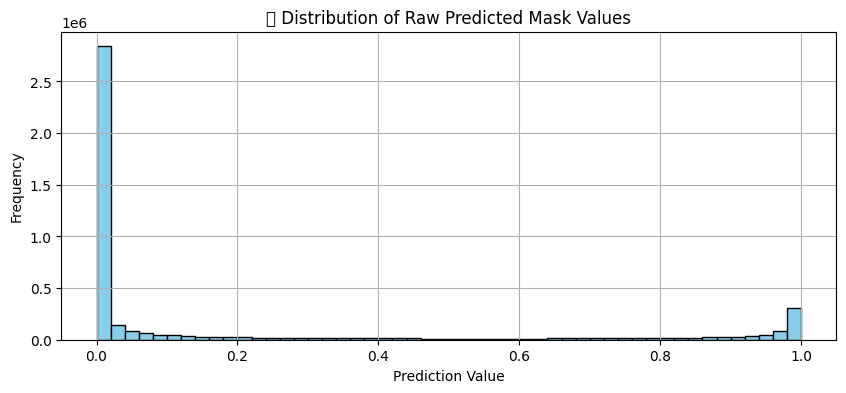

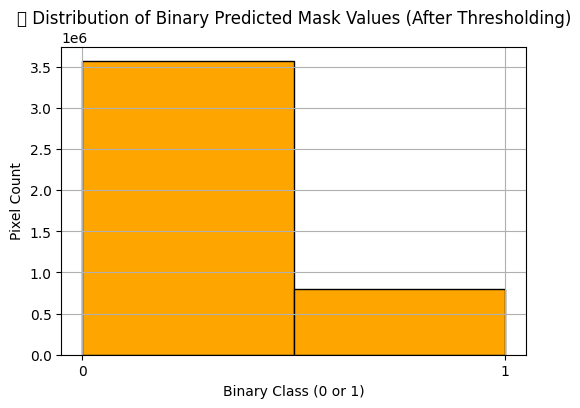

In [ ]:
# Histogram of predicted values before thresholding
preds_raw = modelAA.predict(test_images)

# Flatten predictions
flat_preds_raw = preds_raw.flatten()
flat_preds_binary = (preds_raw > 0.5).astype(int).flatten()

# Plot histogram for raw predicted values
plt.figure(figsize=(10, 4))
plt.hist(flat_preds_raw, bins=50, color='skyblue', edgecolor='black')
plt.title("📈 Distribution of Raw Predicted Mask Values")
plt.xlabel("Prediction Value")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot histogram for binary predicted values
plt.figure(figsize=(6, 4))
plt.hist(flat_preds_binary, bins=2, color='orange', edgecolor='black')
plt.xticks([0, 1])
plt.title("📈 Distribution of Binary Predicted Mask Values (After Thresholding)")
plt.xlabel("Binary Class (0 or 1)")
plt.ylabel("Pixel Count")
plt.grid(True)
plt.show()
